# Lab 2 Report: 
## Iris Classification with Regression

### Name:

In [87]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch

In [88]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [89]:
#Image('lab2_exercise1.PNG', width = 1000)

## Prepare Data

In [90]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Feel free to perform additional data processing here (e.g. standard scaling)

# scale the data using built-in StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)




In [91]:
# Print the first 10 training samples for both features and targets

print(X_train[:10, :], y_train[:10]) 

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]] [0 0 0 0 0 0 0 0 0 0]


In [92]:
# Print the dimensions of features and targets

print(X_train.shape, y_train.shape)

(150, 4) (150,)


In [93]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


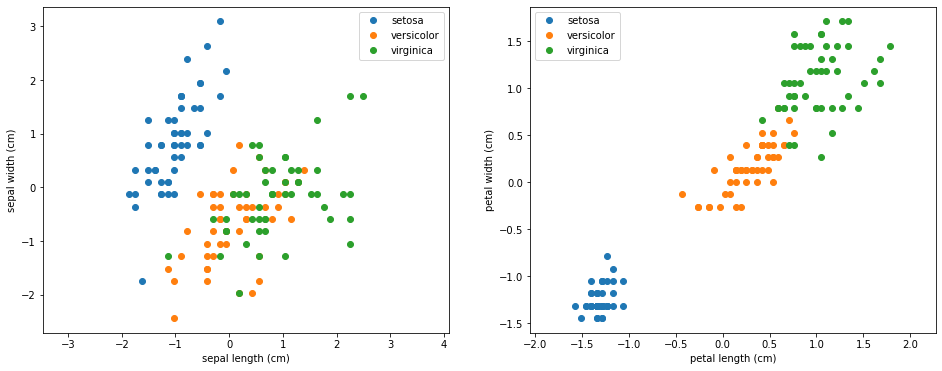

In [94]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):
    
    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]
    
    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):
    
    X_plot = X_train[y_train == target]
    
    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
    
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

## Define Model

In [95]:
class irisClassification(torch.nn.Module):
    
    def __init__(self, input_dim, output_dim):
        
        super(irisClassification, self).__init__()
        self.layer1 = torch.nn.Linear(input_dim, 10)
        self.layer2 = torch.nn.Linear(10, output_dim)
    
    def forward(self, x):
        # use two relus
        x = torch.nn.functional.relu(self.layer1(x))
        x = torch.nn.functional.relu(self.layer2(x))
        
        return x

In [96]:
# print model
irisClassification(4, 3)

irisClassification(
  (layer1): Linear(in_features=4, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=3, bias=True)
)

## Define Hyperparameters

In [97]:
model = irisClassification(4, 3)

learning_rate = 0.7
epochs  =  49 #This has to be <50

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


## Identify Tracked Values

In [98]:
# convert numpy arrays to torch tensors
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

In [99]:
# follow models performance over each epoch. Identify a metric and track it over epochs
#track the loss over epochs
train_loss_list = []


#convert y_train to a one-hot vector
print(y_train.shape)
y_train_one_hot = torch.nn.functional.one_hot(y_train.type(torch.LongTensor), num_classes=3)
y_train_one_hot = y_train_one_hot.type(torch.FloatTensor)
#print(y_train)


torch.Size([150])


## Train Model

In [100]:


for epoch in range(epochs):
    
    # Forward to get output
    y_pred = model(X_train)
    
    # Calculate Loss: Mean square error (MSE)
    loss = loss_func(y_pred, y_train_one_hot)
    train_loss_list.append(loss.item())

    #set current gradient to zero
    optimizer.zero_grad()
    
    # propagate the loss backward
    loss.backward()

    # Update the gradients
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.26488015055656433
epoch 1, loss 0.17448203265666962
epoch 2, loss 0.1345490664243698
epoch 3, loss 0.11485320329666138
epoch 4, loss 0.1035052090883255
epoch 5, loss 0.09620818495750427
epoch 6, loss 0.09057283401489258
epoch 7, loss 0.08582590520381927
epoch 8, loss 0.08168158680200577
epoch 9, loss 0.07807274162769318
epoch 10, loss 0.07484538853168488
epoch 11, loss 0.07200763374567032
epoch 12, loss 0.06948510557413101
epoch 13, loss 0.0672348141670227
epoch 14, loss 0.06519530713558197
epoch 15, loss 0.06331146508455276
epoch 16, loss 0.06159023568034172
epoch 17, loss 0.059976041316986084
epoch 18, loss 0.05842529609799385
epoch 19, loss 0.05694454163312912
epoch 20, loss 0.05553855374455452
epoch 21, loss 0.05419934540987015
epoch 22, loss 0.05291687697172165
epoch 23, loss 0.05166822671890259
epoch 24, loss 0.0504375621676445
epoch 25, loss 0.04925113543868065
epoch 26, loss 0.04810807481408119
epoch 27, loss 0.04700639098882675
epoch 28, loss 0.0459453947842121

## Visualize and Evaluate Model

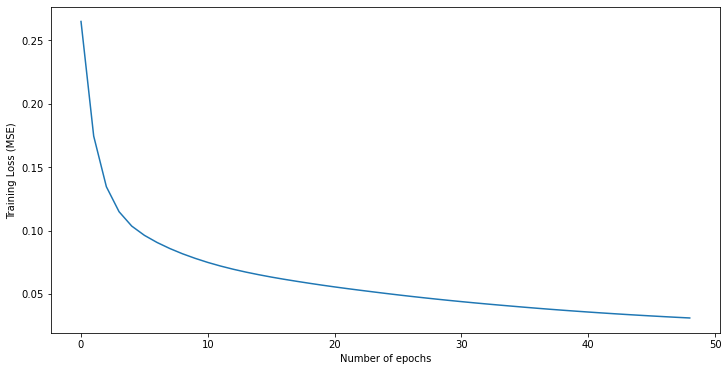

layer1.weight tensor([[-2.9217e-04,  1.4139e-01, -7.3053e-02, -5.0354e-01],
        [-1.1304e-02, -2.0095e-02, -7.1715e-02,  3.1151e-01],
        [-1.1320e-01,  2.3231e-01, -1.9963e-01,  4.0024e-01],
        [ 2.0222e-01, -1.2306e-01,  3.0078e-01, -5.5417e-01],
        [-4.6010e-01,  1.0517e-01, -6.2508e-01, -5.3206e-01],
        [ 2.5129e-02, -2.5635e-01,  3.5633e-01,  5.3801e-01],
        [ 2.3921e-01, -2.5966e-02,  2.3366e-02,  5.8884e-01],
        [ 4.2242e-01, -3.8942e-01, -3.6815e-02, -3.8630e-01],
        [-3.1005e-01, -5.2182e-01, -2.5040e-02, -1.4988e-01],
        [-3.1967e-01, -3.5949e-02, -1.0073e-01,  4.5898e-02]])
layer1.bias tensor([ 0.6589,  0.3307, -0.5353,  0.0796, -0.1023,  0.4759, -0.0111,  0.2462,
         0.1545, -0.4741])
layer2.weight tensor([[ 0.3973,  0.1724, -0.0513,  0.0366,  0.1842, -0.4561, -0.0380, -0.1176,
         -0.0387,  0.1140],
        [ 0.5378,  0.1685,  0.2404,  0.1185, -0.7482, -0.1823, -0.3038,  0.1926,
          0.2686,  0.0896],
        [-0.52

In [101]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss (MSE)")
plt.show()

#Print final parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)


In [102]:
# Confirm that your model's training accuracy is >90%
# Training accuracy = (# of correct predictions) / (total # of training samples)
# You can round the model predictions to integer (e.g. 0.34 -> 0, 1.78 -> 2)

# YOUR CODE HERE

with torch.no_grad():
    # Compare your model predictions with targets (y_train) to compute the training accuracy     
    model_predictions = np.argmax(np.round(model(X_train), 1), axis = 1)

    #convert y_train from a one-hot vector to a single integer
    y_train = np.argmax(y_train_one_hot, axis = 1)

    print(model_predictions)
    print(y_train)

    #calculate training accuracy
    #difference between model predictions and training targets
    difference = model_predictions - y_train
    #number of correct predictions
    correct_predictions = np.count_nonzero((difference == 0))
    #training accuracy
    training_accuracy = correct_predictions / len(y_train)

print(training_accuracy)
        


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2,